<a href="https://colab.research.google.com/github/HyeonhoonLee/marbling/blob/master/TFGuide/ML_basic_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#기본 이미지 분류

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4993 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3753 - accuracy: 0.8637
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3387 - accuracy: 0.8758
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3127 - accuracy: 0.8857
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3504 - accuracy: 0.8711
2


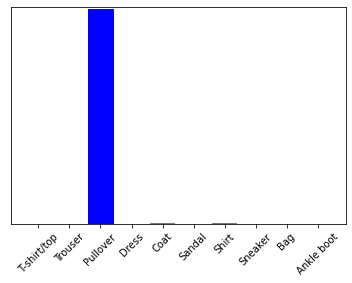

In [ ]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#각 레이블(0~9)에 해당하는 클래스 이름
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images /255
test_images = test_images /255

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)


def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Grab an image from the test dataset.
img = test_images[1]
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

predictions_single = model.predict(img)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
print(np.argmax(predictions_single[0]))

#기본 텍스트 분류